In [1]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_2/data/HRstars.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2024-07-19 21:53:17--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_2/data/HRstars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1284 (1.3K) [text/plain]
Saving to: ‘HRstars.csv.1’

HRstars.csv.1       100%[===================>]   1.25K  --.-KB/s    in 0s      

2024-07-19 21:53:17 (50.2 MB/s) - ‘HRstars.csv.1’ saved [1284/1284]



# The Hertzsprung-Russell Diagram

## Section 1: Background

In this activity, you are going to make one of the most important tools in Astronomy, a Hertzprung-Russell (HR) diagram. HR diagrams show the relationship between the temperature of a star and a star's luminosity. These diagrams are tremendously useful for studying stars because, different types of stars fall in specific places on an HR diagram.



## Section 2: Loading data

The file `HRstars.csv` contains data for a set of stars arranged in two columns:
 - the temperature (in Kelvin) and
 - the luminosity (in solar luminosities).

Use `numpy` to read the data file and extract the appropriate data as separate variables. Since this is a comma separated value file, you will need to use `delimiter=','` in your call to `loadtxt`.

In [2]:
!cat HRstars.csv

11167.612068479455,75566.09783073248
9352.580038484033,346676.14161546767
7469.126423443611,13705.097492386896
3394.4262058582344,59657.54798547307
3470.5234430663613,16471.381949605257
6176.44902269436,2123.225872914106
4688.87856302397,56.604598078129214
4387.156762278014,170.58434156348005
4040.3570113945398,252.95415943450396
27628.534130359592,100879.35141739207
20064.61106719092,5611.1183589915545
25768.936506938742,25074.9192853052
15088.09195128087,704.5450131228118
9745.702260376522,62.875157716457196
9382.248884244389,26.427326600397656
7907.316005625131,10.539346627482471
6643.175489641213,7.296555172668332
5797.336976649595,1.6762338275175157
5797.336976649601,0.9912831376784479
5139.950586229876,0.514075155987892
4290.960751997412,0.15357191048597174
4002.148454574857,0.09323559550487617
3604.965992810102,0.049638367551622
3267.8354654898817,0.0197960228652508
3176.0003341780957,0.00999999999999998
3057.5555045276965,0.005051519725991802
3076.985015285863,0.002987343556621

In [3]:
import numpy as np

hr_data = np.loadtxt('HRstars.csv', delimiter=',', skiprows=1)
print(hr_data)

[[9.35258004e+03 3.46676142e+05]
 [7.46912642e+03 1.37050975e+04]
 [3.39442621e+03 5.96575480e+04]
 [3.47052344e+03 1.64713819e+04]
 [6.17644902e+03 2.12322587e+03]
 [4.68887856e+03 5.66045981e+01]
 [4.38715676e+03 1.70584342e+02]
 [4.04035701e+03 2.52954159e+02]
 [2.76285341e+04 1.00879351e+05]
 [2.00646111e+04 5.61111836e+03]
 [2.57689365e+04 2.50749193e+04]
 [1.50880920e+04 7.04545013e+02]
 [9.74570226e+03 6.28751577e+01]
 [9.38224888e+03 2.64273266e+01]
 [7.90731601e+03 1.05393466e+01]
 [6.64317549e+03 7.29655517e+00]
 [5.79733698e+03 1.67623383e+00]
 [5.79733698e+03 9.91283138e-01]
 [5.13995059e+03 5.14075156e-01]
 [4.29096075e+03 1.53571910e-01]
 [4.00214845e+03 9.32355955e-02]
 [3.60496599e+03 4.96383676e-02]
 [3.26783547e+03 1.97960229e-02]
 [3.17600033e+03 1.00000000e-02]
 [3.05755550e+03 5.05151973e-03]
 [3.07698502e+03 2.98734356e-03]
 [2.68520966e+03 5.86220277e-04]
 [8.61326923e+03 4.87767576e-04]
 [2.47294689e+04 2.31749610e-02]
 [2.48079173e+03 2.96130329e-04]
 [5.581132

In [4]:
T_HR = hr_data[:,0]
L_HR = hr_data[:,1]

print(T_HR)
print()
print(L_HR)

[ 9352.58003848  7469.12642344  3394.42620586  3470.52344307
  6176.44902269  4688.87856302  4387.15676228  4040.35701139
 27628.53413036 20064.61106719 25768.93650694 15088.09195128
  9745.70226038  9382.24888424  7907.31600563  6643.17548964
  5797.33697665  5797.33697665  5139.95058623  4290.960752
  4002.14845457  3604.96599281  3267.83546549  3176.00033418
  3057.55550453  3076.98501529  2685.20966118  8613.26922667
 24729.46892371  2480.79173087  5581.13278321  4885.96881526
  2576.89365069]

[3.46676142e+05 1.37050975e+04 5.96575480e+04 1.64713819e+04
 2.12322587e+03 5.66045981e+01 1.70584342e+02 2.52954159e+02
 1.00879351e+05 5.61111836e+03 2.50749193e+04 7.04545013e+02
 6.28751577e+01 2.64273266e+01 1.05393466e+01 7.29655517e+00
 1.67623383e+00 9.91283138e-01 5.14075156e-01 1.53571910e-01
 9.32355955e-02 4.96383676e-02 1.97960229e-02 1.00000000e-02
 5.05151973e-03 2.98734356e-03 5.86220277e-04 4.87767576e-04
 2.31749610e-02 2.96130329e-04 5.86220277e-01 3.28935136e-01
 8.03420

## Section 3: Plotting the stellar data

Use `scatter` to plot the data with temperature along the x-axis and luminosity against the y-axis.

Give your figure the title 'HR Diagram' and label your axes correctly.

Text(0.5, 1.0, 'HR Diagram')

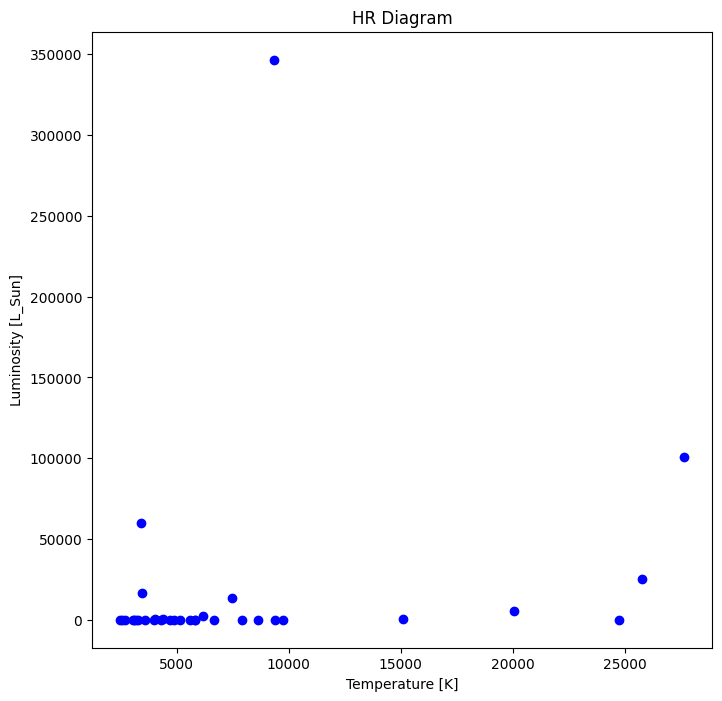

In [5]:
# Plot the data

# Create title

# Create x, y labels with units.

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(T_HR, L_HR, c = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Luminosity [L_Sun]')
plt.title('HR Diagram')

## Section 4: Adjusting your figure

We're going to make some adjustments to your plot. HR diagrams are traditionally plotted with temperature increasing from right to left.

Typically, you can adjust your figure's domain by using `plt.xlim([x1, x2])` by adjusting `x1` and `x2` to fit the region you want. To reverse the axis, you can put a high value for `x1` and a lower value for `x2`. Replot your data and play with different values of `x1` and `x2` until you are happy with the values decreasing from left to right.

(5000.0, 10000.0)

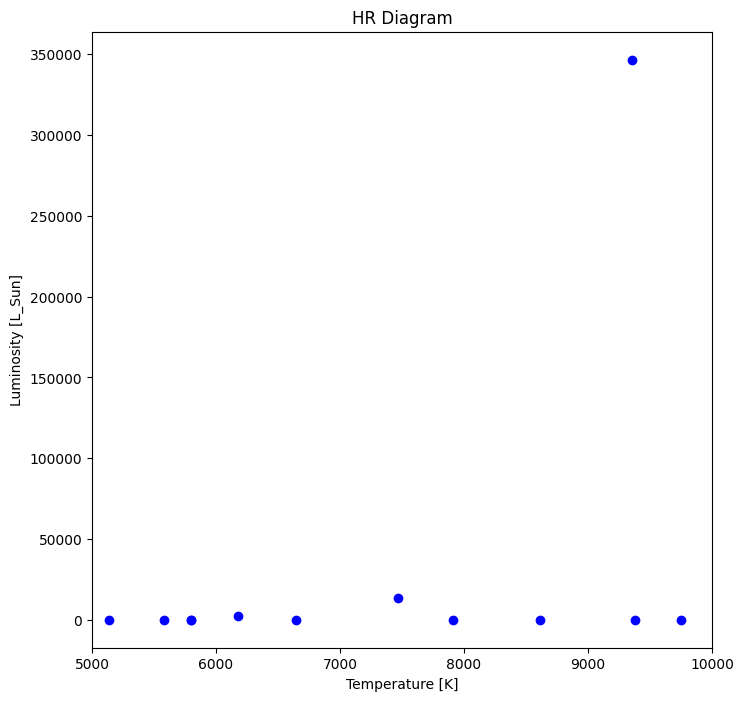

In [6]:
# Replot data - you can copy from above

# Change limits
plt.figure(figsize=(8,8))
plt.scatter(T_HR, L_HR, c = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Luminosity [L_Sun]')
plt.title('HR Diagram')
plt.xlim([5000,10000])

Also, you might notice that a lot of the data points are crowded around near temperature=5000 K and luminosity = 0. This often occurs in astronomy because values span many "orders of magnitude" (i.e. factors of 10).

One way to nicely deal with this is to change the axes to a log scale (`plt.xscale('log')` and `plt.yscale('log')`). Create a new version of your figure that uses logarithmic scaling for both axes. You may need to adjust the domain of the figure you chose in the previous step.

(30000.0, 2000.0)

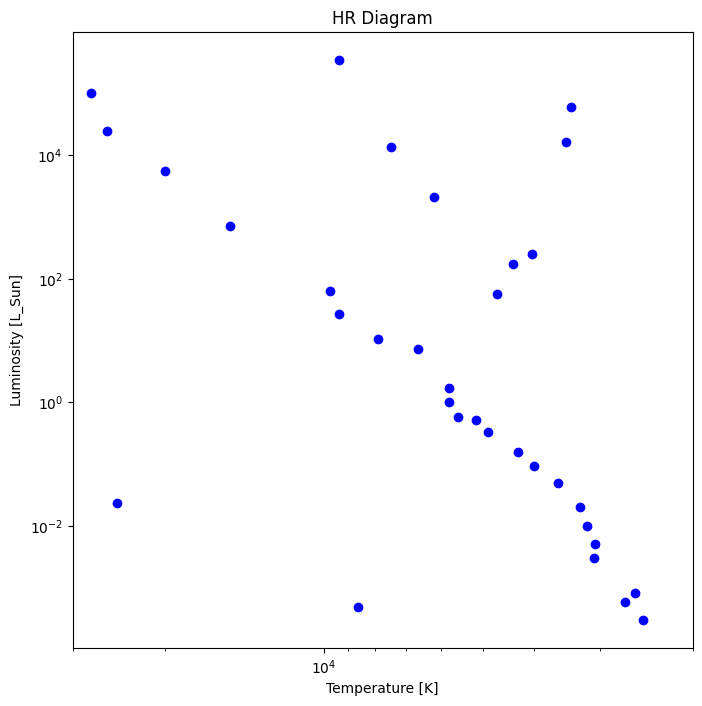

In [7]:
# Replot data

# Change to logarithmic scales
plt.figure(figsize=(8,8))
plt.scatter(T_HR, L_HR, c = 'blue')
plt.xlabel('Temperature [K]')
plt.ylabel('Luminosity [L_Sun]')
plt.title('HR Diagram')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e4,2e3])

You have created a standard HR diagram that you would find in any textbook.

## Section 5: Adding color

Lets add some color! Hotter stars are bluer and colder stars are redder, so lets use a color map called `RdYlBu` for the colors of the points.

The `scatter` function allows you to change the colors of the points based on an array of input values. Use the `c` and `cmap` arguments in the `scatter` function to add color to your HR diagram. Refer to [Plotting with Matplotlib](https://github.com/CIERA-Northwestern/REACHpy/blob/main/Module_2/Section_3_Plotting_with_Matplotlib.ipynb) notebook for examples of using `scatter`.

Play around with the mapping until your hottest stars are blue and coldest stars are red.

*Hint: Since our temperatures span orders of magnitude, instead of giving your temperature values directly to `c`, you may want to give the `log10` of the temperature values to `c`.*

(30000.0, 2000.0)

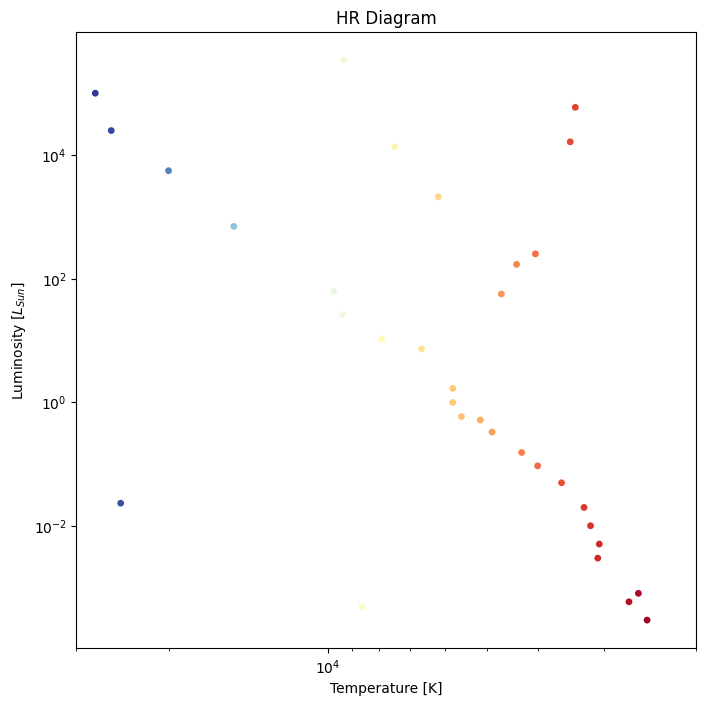

In [8]:
from matplotlib import colormaps
cm = colormaps['RdYlBu']  ##This is the color map for the stars

plt.figure(figsize=(8,8))
plt.scatter(T_HR, L_HR, c = np.log10(T_HR),cmap = cm, s=15)
plt.xlabel('Temperature [K]')
plt.ylabel('Luminosity [$L_{Sun}$]')
plt.title('HR Diagram')
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e4,2e3])

## Section 6: Taking it to the next level

Hotter stars are brighter, but it also turns out bigger stars are brighter because they have more surface area to emit light from. A fundamental relationship in astronomy relates a star's luminosity, radius, and temperature.

\begin{equation}
\frac{L}{L_{\odot}}=\Big(\frac{R}{R_{\odot}}\Big)^2\Big(\frac{T}{T_{\odot}}\Big)^4
\end{equation}

with $T_{\odot}$ = 5780 K.

Note that your data points already express the luminosity in solar luminosities $L_{\odot}$.

Solve for $\frac{R}{R_{\odot}}$ using the data already provided.

The scatter function also allows you to specify the size of points based on an array of input values.



In [9]:
# Approximate the sizes of the stars with the equation above and multiply them by 15.
T_sun=5780. # K
r_star=15 * np.sqrt(L_HR * (T_sun/T_HR)**4)

Add `s=r_star` to your scatter argument to change the size of the stars in your figure to be representative of the size of the actual stars.

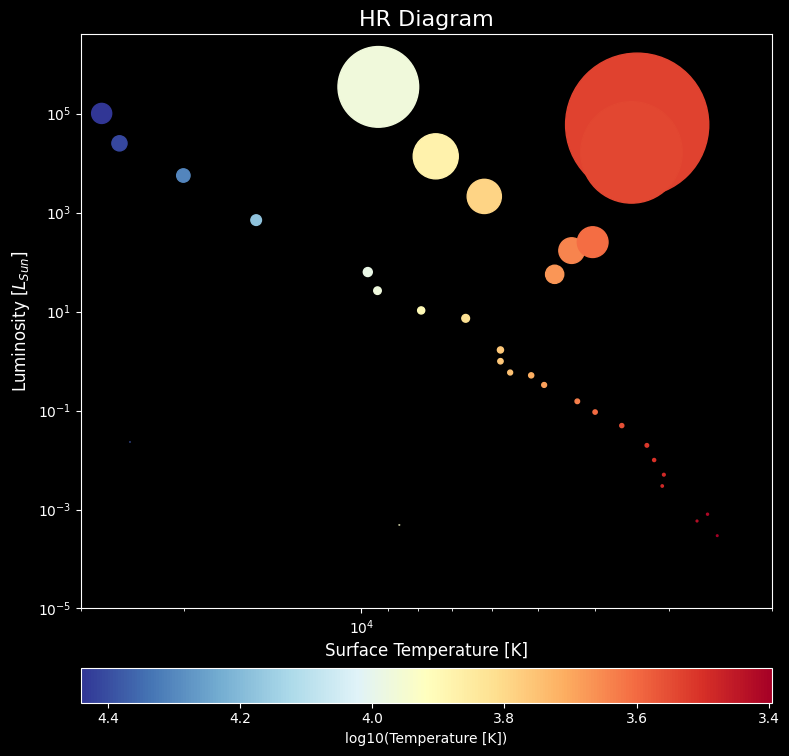

In [12]:
# Replot the data including size argument

plt.figure(figsize=(8,8), dpi = 100)
plt.style.use('dark_background')
plt.scatter(T_HR, L_HR, c = np.log10(T_HR),cmap = cm, s=r_star)
plt.xlabel('Surface Temperature [K]', fontsize=12)
plt.ylabel('Luminosity [$L_{Sun}$]', fontsize=12)
plt.title('HR Diagram', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.xlim([3e4,2e3])
plt.ylim([1e-5,4e6])
cbar = plt.colorbar(orientation='horizontal', label = 'log10(Temperature [K])', pad=0.08)
cbar.ax.invert_xaxis()
plt.tight_layout()

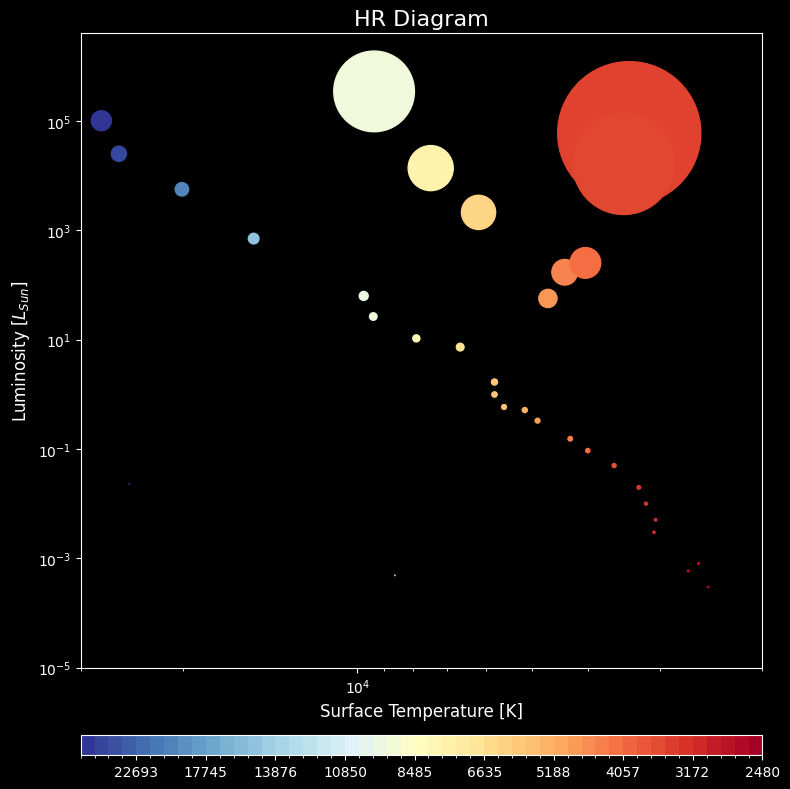

In [11]:
# Replot the data including size argument
import matplotlib as mpl
plt.figure(figsize=(8,8), dpi = 100)
plt.style.use('dark_background')

ax1 = plt.subplot2grid((9, 10), (0,0), rowspan=8, colspan=10)
cm = colormaps['RdYlBu']  ##This is the color map for the stars
ax1.scatter(T_HR, L_HR, c = np.log10(T_HR),cmap = cm, s=r_star)
ax1.set_xlabel('Surface Temperature [K]', fontsize=12)
ax1.set_ylabel('Luminosity [$L_{Sun}$]', fontsize=12)
ax1.set_title('HR Diagram', fontsize=16)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([3e4,2e3])
ax1.set_ylim([1e-5,4e6])

ax2 = plt.subplot2grid((9, 10), (8, 0), rowspan=1, colspan=10)
minT = np.log10(T_HR.min())
maxT = np.log10(T_HR.max())
bounds = np.logspace(minT, maxT)
# set boundaries
N = len(T_HR)
norm = mpl.colors.BoundaryNorm(bounds, cm.N)
cb = mpl.colorbar.Colorbar(ax2,
                               cmap=cm,
                               spacing='uniform',
                               orientation ='horizontal',
                               boundaries = bounds,
                               norm = norm,
                               format='%1i')
cb.ax.invert_xaxis()

plt.tight_layout()

What do you notice about the stars in your H-R Diagram? The features you see in this diagram correspond to different types of stars, as you can see in the HR diagram shown below.

!['HR diagram'](https://github.com/CIERA-Northwestern/REACHpy/blob/main/Module_2/images/eso0728c.jpg?raw=1)

Each of these different types of stars correspond to interesting physics that happens at different points in the lifetime of stars. The "main sequence" is where stars live during the vast majority of their life, while they are fusing Hydrogen as a source of fuel. "Giant" stars are what you get when stars near the end of their lives. Though the exact physics is too complicated for this lesson, in short, stars near the end of their lives start burning a huge amount of fuel in a short amount of time, causing them to swell up and get very large and bright. But because the stars are so large, their surfaces also cool down some.

Finally, white dwarfs are the remnants of an old giant star when it can no longer produce nuclear reactions. Since they are small (about the size of Earth!), they aren't very bright.
